# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [1]:
# importa las librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib import image as mping

#### 2. Lee las imagenes
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [2]:
'''
Las imagenes a color se representan comunmente como un array 3d de dimensiones: (Alto, Ancho, Canales)
    -Alto y Ancho: La medida de la imagen en pixeles 
    -Canales: Generalmente son 3 (rojo, verde, azul -RGB).
    Cada pixel tiene 3 numeros que definen su color

'''

try:
    img = mping.imread(r'C:\Users\joseb\Documents\the_bridge\ONLINE_DS_THEBRIDGE_jbenegasb\modulo_1\2509_dsft_thebridge\3-Machine Learning\2-No_Supervisado\1-Clustering\Practica\mi_imagen.png')
except FileNotFoundError:
    #Si no tienes imagen, creemos un gradiente de prueba para que el codigo no falle
    X, Y = np.meshgrid(np.linspace(0, 1, 200), np.linspace(0, 1, 200))
    img = np.stack((X, Y, X*Y), axis= 2)
    print("Usando imagen generada por defecto por defecto (gradiente)")

# Comprobar las dimensiones 
print(f"Dimensiones originales: {img.shape}")

Dimensiones originales: (288, 432, 4)


Muestra la imagen para ver que se ha cargado bien

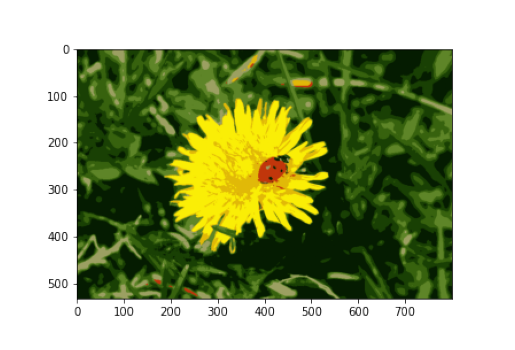

In [3]:
# usa imshow para mostrar la imagen
plt.imshow(img)
plt.axis('off')
plt.show()

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [4]:
# modifica las dimensiones del numpy array
'''
"Aplanar" las imagen (flattenig) 
El algoritmo K-means no "ve" formas ni objetos ( no sabe que es un perro o un arbol)
solo ve datos numericos. Espera una tabla donde cada fila es una observacion 
y cada columna es una caracteristica.
    -Observacion: cada pixel individual
    -Caractersticas: las candida de rojo, verde y azul de ese pixel
Por tanto, transformamos la matriz 3D ( Alto, Ancho, 3 ). Es como poner todos los pixeles 
en una fila india larguisima 
'''


h, w , c = img.shape

#reformateamos la imagen a una lista larga de pixeles (N_pixeles, 3_colores)
# -1 le dice a numpy: "calcula tu el tamano de esta dimiencion basandote en la otra"
img_reshaped = img.reshape(-1,3)

print(f"NUevas dimensiones para K-means: {img_reshaped.shape} ")
#ejemplo: si la imgen es 100x100, ahora tendremos 1000 filas y 3 columnas 

NUevas dimensiones para K-means: (165888, 3) 


#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [5]:
#Definimos el numero de colores (clusters) que queremos 
#Por ejemplo, reduciremos la imagen a solo 8 colores
k_colors = 8

#creamos el modelo
kmeans = KMeans(n_clusters=k_colors, random_state=42, n_init=10)

#Entrenamos el modelo con nuestros pixeles 
print('entrenando K-Means.... esto puede tardar un poco si la imagen es grande.')
kmeans.fit(img_reshaped)

print("Entrenamiento completado!")
# Los 'cluster_centers_' son los 8 colores RGB proemdio encontrados


entrenando K-Means.... esto puede tardar un poco si la imagen es grande.
Entrenamiento completado!


#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizas para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [6]:
'''
Una vez entrenado, K-means nos da dos cosas importantes:
    1- kmeans.labels_ : una lista que dice a que grupo pertenece cada pixel original 
    2- kmeans.cluster_centers_ : Los valores RGB exactos de esos grupos 
para comprimir la imagen, simplemente reemplazamos el color original de cada pixel por 
el color de su centroide
'''

#Obtenemos los colores representativos(centroides)
#A veces son floats, nos aseguramos de que tengan el formatos correcto
palette = kmeans.cluster_centers_

#obtenemos las etiquetas ( a que color pertenece cada pixel )
labels = kmeans.labels_

# creamos los nuevos pixeles:
# para cada etiqueta en 'labels', buscamos su color correspondiente en 
new_pixels = palette[labels]

# Si la imgen original eran enteros (0-255), convertimos a enteros.
# Si eran floats (0-1), lo dejamos asi.
if img.dtype == 'unint8': 
    new_pixels = new_pixels.astype('uint8')

print(f'Dimensiones de los nuevos pixeles: {new_pixels.shape}')

Dimensiones de los nuevos pixeles: (165888, 3)


#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [7]:

'''
ahora tenemos una lista larguisima de pixeles con los colores reducidos,
pero sigue siendo una lista 2D (N, 3). Para que nosotros (y Matplotlib) podamos 
verla como una imagen, tenemos que volver a darle su forma original de (Alto, Ancho, 3)

'''

img_compressed = new_pixels.reshape(h, w, c)

print(f'Dimensiones reconstruidas: {img_compressed.shape}')

Dimensiones reconstruidas: (288, 432, 4)


#### 7. Imprime y guarda en tu ordenador la imagen resultante

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0048962235..1.000002].


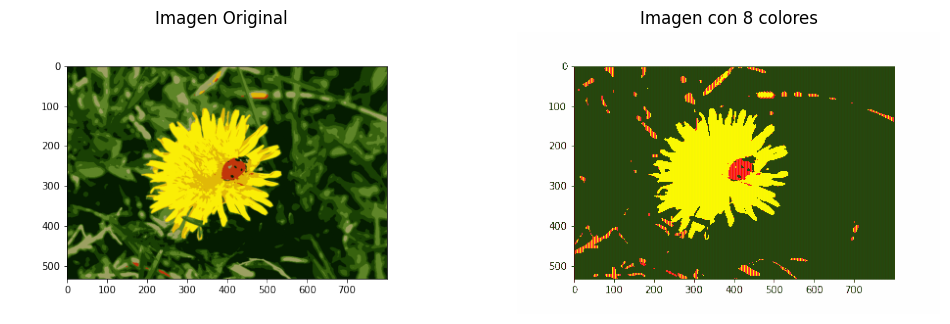

In [8]:
''' Comparar el antes y el despues para ver como l reduccion de colores afecta
a la calidad visual y al estilo de imagen '''


#mostramos la comparacion 
fig, ax = plt.subplots(1 , 2, figsize= (12,6))

#imagen original
ax[0].imshow(img)
ax[0].set_title('Imagen Original')
ax[0].axis('off')

#imagen K-means
ax[1].imshow(img_compressed)
ax[1].set_title(f'Imagen con {k_colors} colores')
ax[1].axis('off')

plt.show()

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [13]:
# Celda 8
def reducir_colores_imagen(ruta_imagen, k, mostrar=True, guardar=False):
    """
    Lee una imagen, reduce sus colores usando K-Means y la muestra/guarda.
    
    Args:
        ruta_imagen (str): Ruta del archivo de imagen.
        k (int): Número de colores deseados.
        mostrar (bool): Si True, muestra la comparación en pantalla.
        guardar (bool): Si True, guarda la imagen resultante.
    """
    try:
        # 1. Leer imagen
        img_original = mpimg.imread(ruta_imagen)
        
        # Validar si es PNG con transparencia (4 canales) y quitar el canal alpha si existe
        if img_original.shape[2] == 4:
             img_original = img_original[:, :, :3]
             
        h, w, c = img_original.shape
        
        # 2. Preprocesar (Flatten)
        img_flat = img_original.reshape(-1, 3)
        
        # 3. Aplicar K-Means
        # Usamos n_init='auto' o un número fijo para evitar warnings futuros
        kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans_model.fit(img_flat)
        
        # 4. Sustituir colores
        centros = kmeans_model.cluster_centers_
        etiquetas = kmeans_model.labels_
        
        # Reconstruir usando los centroides
        img_new_flat = centros[etiquetas]
        
        # Manejo de tipos de datos (int 0-255 o float 0-1)
        if img_original.dtype == 'uint8':
            img_new_flat = img_new_flat.clip(0, 255).astype('uint8')
        else:
            img_new_flat = img_new_flat.clip(0, 1) # Asegurar que floats estén en rango válido
            
        # 5. Reconstruir forma
        img_final = img_new_flat.reshape(h, w, c)
        
        # 6. Mostrar
        if mostrar:
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            axes[0].imshow(img_original)
            axes[0].set_title("Original")
            axes[0].axis('off')
            
            axes[1].imshow(img_final)
            axes[1].set_title(f"Reducida a {k} colores")
            axes[1].axis('off')
            plt.tight_layout()
            plt.show()
            
        # 7. Guardar
        if guardar:
            nombre_salida = f"compressed_k{k}.png"
            plt.imsave(nombre_salida, img_final)
            print(f"Imagen guardada como: {nombre_salida}")
            
        return img_final

    except Exception as e:
        print(f"Ocurrió un error: {e}")

# Prueba de la función (asegúrate de tener una imagen llamada 'tu_imagen.jpg' o cambia el nombre)
# reducir_colores_imagen('tu_imagen.jpg', k=4, guardar=False)

